In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/randaas/mall-customers/Mall_Customers.csv
/kaggle/input/mall-customers/Mall_Customers.csv


# MISSION

The Mall customers dataset contains information about people visiting the mall. The dataset has gender, customer id, age, annual income, and spending score. It collects insights from the data and group customers based on their behaviors.

I will segment the customers based on the age, gender, interest. Customer segmentation is an important practise of dividing customers base into individual groups that are similar. It is useful in customised marketing.

### SUMMARY
**Part 1 : Data import**
 - <a href="#C1">Librairies & Dataset import</a>
 
**Part 2 : Dataset analysis**
 - <a href="#C2">Total lignes and columns</a>
 - <a href="#C3">Missing values</a>
 - <a href="#C4">Data types</a>
 
**Part 3 : Dataset cleaning**
 - <a href="#C5">Primary key</a>
 - <a href="#C6">Duplicated</a>
 - <a href="#C7">Empty columns</a> 
 
**Part 4 : Univariate Analysis**
 - <a href="#C8">Outliers detection with IQR method</a>
 - <a href="#C9">Boxplots</a>

**Part 5 : Bivariate Analysis**
 - <a href="#C10">Correlation Matrix</a>
 - <a href="#C9">Boxplots</a>

# **<font color='indianred'>Part 1 : Data import</font></a>**

# <a name="C1"><font color='darkblue'>Librairies and Dataset import</font></a>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [4]:
df_customers=pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')
df_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **<font color='indianred'>Part 2 : Dataset analysis</font></a>**

# <a name="C1"><font color='darkblue'>Total lignes and columns</font></a>

In [5]:
df_customers.shape

(200, 5)

There are 200 rows and 5 columns.

In [6]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df_customers.describe(include=[np.number])

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# <a name="C3"><font color='darkblue'>Missing values</font></a>

In [8]:
df_customers.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values.

# <a name="C4"><font color='darkblue'>Data types</font></a>

In [9]:
#Variables types
df_customers.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
#Total of types
df_customers.dtypes.value_counts()

int64     4
object    1
dtype: int64

There are 4 integer variables and 1 object variable.

# **<font color='indianred'>Part 3 : Dataset cleaning</font></a>**

# <a name="C5"><font color='darkblue'>Primary key</font></a>

In [11]:
#Function testing the unicity of a variable
def primary_key (df, col) :
    if len(df)==len(df[col].unique()):
        print(col, 'is a primary key')
    else: 
        print(col, 'is not a primary key')

In [12]:
primary_key(df_customers,'CustomerID')

CustomerID is a primary key


# <a name="C6"><font color='darkblue'>Duplicated</font></a>

In [13]:
#Function detecting duplicated rows
def detect_duplicated(df):
    dupli=df[df.duplicated()]
    print('------------------') 
    print(len(dupli), 'duplicated rows')
    print(dupli.shape)
    print('\n') 
    print(dupli)
    print('\n')

detect_duplicated (df_customers)

------------------
0 duplicated rows
(0, 5)


Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []




# <a name="C7"><font color='darkblue'>Empty columns</font></a>

In [14]:
print('Empty columns list:')
[col for col in df_customers.columns if df_customers[col].isnull().all()]

Empty columns list:


[]

There are not empty columns.

# **<font color='indianred'>Part 4 : Univariate Analysis</font></a>**

 # <a name="C8"><font color='darkblue'>Outliers detection with IQR method</font></a>


In [15]:
#Function detecting outliers 

def list_outliers(df, column):
  #1st quartile
  q1 = df[column].quantile(0.25)
  #3rd quartile
  q3 = df[column].quantile(0.75)
  #IQR
  iqr = q3 - q1
  print('Q1=', round(q1,2))
  print('Q3=', round(q3,2) )
  print('IQR =', round(iqr,2))
  treshold_min = q1 -(1.5 * iqr) 
  treshold_max = q3 +(1.5 * iqr)
  print('Minimum treshold =', round(treshold_min,2))
  print('Maximum treshold =', round(treshold_max,2))

  #Outliers dataframe
  dfo = df[(df[column] < treshold_min) | (df[column] > treshold_max)]
  #Outliers list
  liste_out=(dfo[column].tolist())
  print('Total outliers:', len(liste_out))
  print('List of outliers :', liste_out)
  print('\n')

print('Variable Age :')
list_outliers(df_customers, 'Age')
print('Variable Annual Income :')
list_outliers(df_customers, 'Annual Income (k$)')
print('Spending Score :')
list_outliers(df_customers, 'Spending Score (1-100)')


Variable Age :
Q1= 28.75
Q3= 49.0
IQR = 20.25
Minimum treshold = -1.62
Maximum treshold = 79.38
Total outliers: 0
List of outliers : []


Variable Annual Income :
Q1= 41.5
Q3= 78.0
IQR = 36.5
Minimum treshold = -13.25
Maximum treshold = 132.75
Total outliers: 2
List of outliers : [137, 137]


Spending Score :
Q1= 34.75
Q3= 73.0
IQR = 38.25
Minimum treshold = -22.62
Maximum treshold = 130.38
Total outliers: 0
List of outliers : []




 # <a name="C9"><font color='darkblue'>Boxplots</font></a>


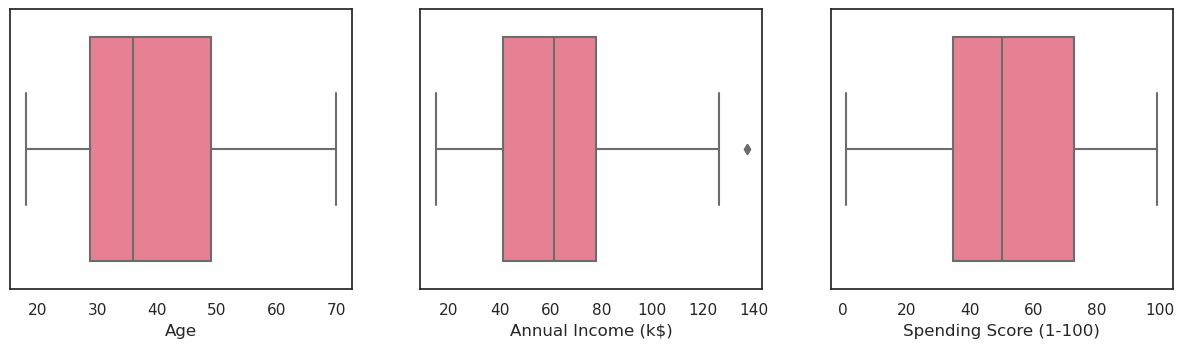

In [16]:
#Boxplot for each variable
plt.figure(figsize=(15, 8))
sns.set(style="white", palette="husl")
plt.subplot(2, 3, 1)

plt.subplot(231)
sns.boxplot(data=df_customers, x='Age')

plt.subplot(232)
sns.boxplot(data=df_customers, x='Annual Income (k$)')

plt.subplot(233)
sns.boxplot(data=df_customers, x='Spending Score (1-100)')


plt.savefig("boxplots_uni.png")
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Age', ylabel='Density'>

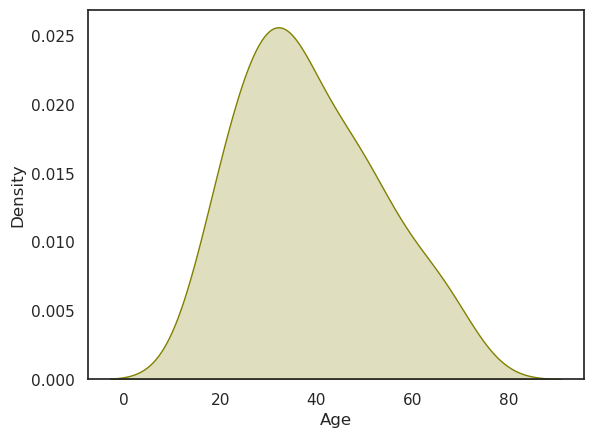

In [17]:
sns.kdeplot(df_customers['Age'], shade=True, bw_method=0.5, color="olive")

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

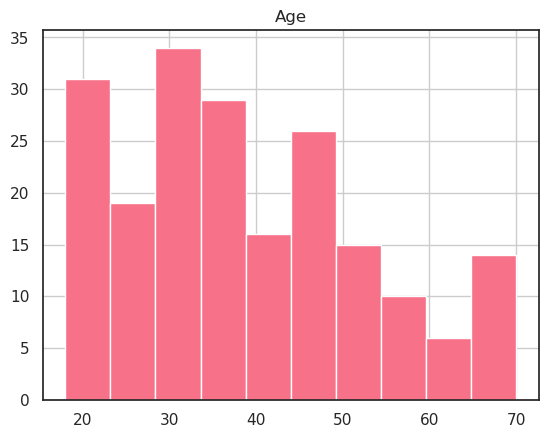

In [18]:
df_customers.hist(column='Age')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

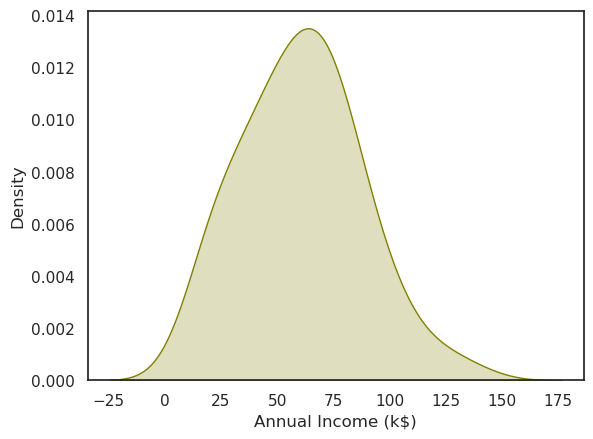

In [19]:
sns.kdeplot(df_customers['Annual Income (k$)'], shade=True, bw_method=0.5, color="olive")

array([[<AxesSubplot:title={'center':'Annual Income (k$)'}>]],
      dtype=object)

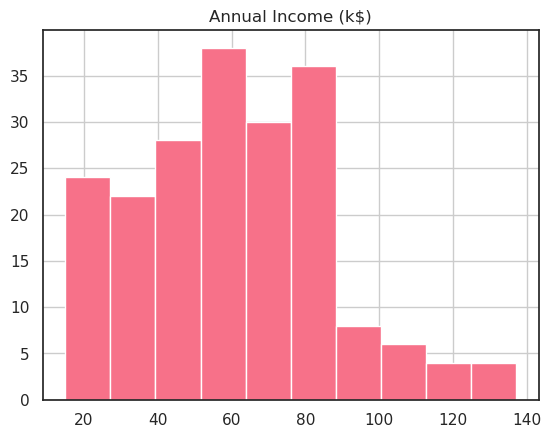

In [20]:
df_customers.hist(column='Annual Income (k$)')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

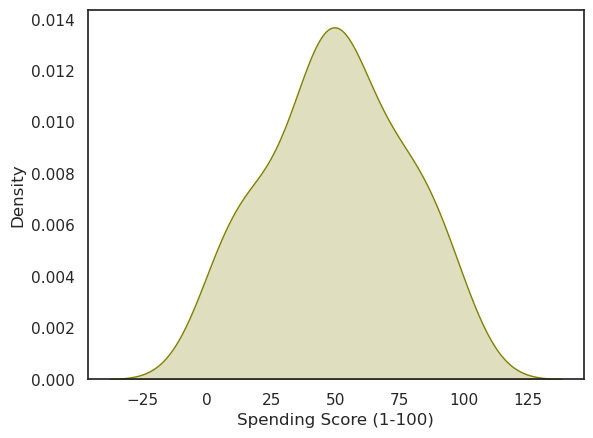

In [21]:
sns.kdeplot(df_customers['Spending Score (1-100)'], shade=True, bw_method=0.5, color="olive")

array([[<AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

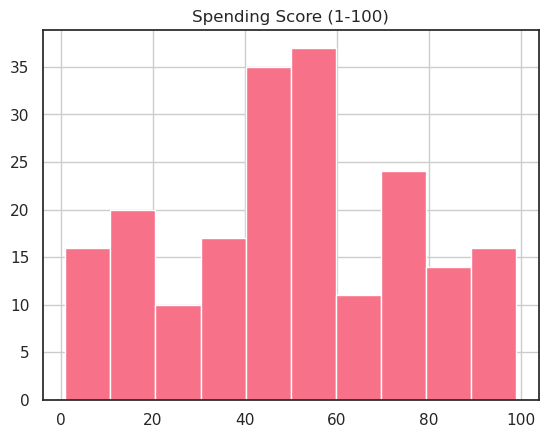

In [22]:
df_customers.hist(column='Spending Score (1-100)')

# **<font color='indianred'>Part 5 : Bivariate Analysis</font></a>**

 # <a name="C10"><font color='darkblue'>Correlation Matrix</font></a>

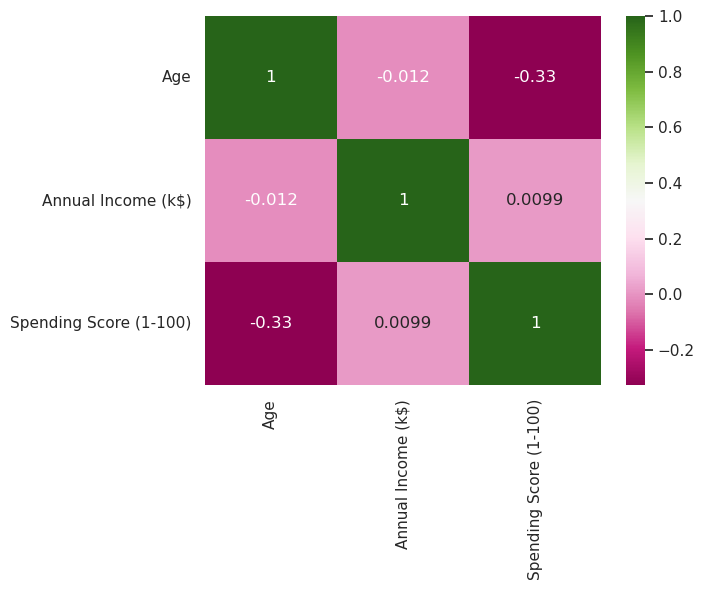

In [23]:
variables=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
matrix = df_customers[variables].corr()
sns.heatmap(data=matrix, annot=True, cmap='PiYG')
plt.savefig("matrice_corr.png")

<Figure size 1500x1000 with 0 Axes>

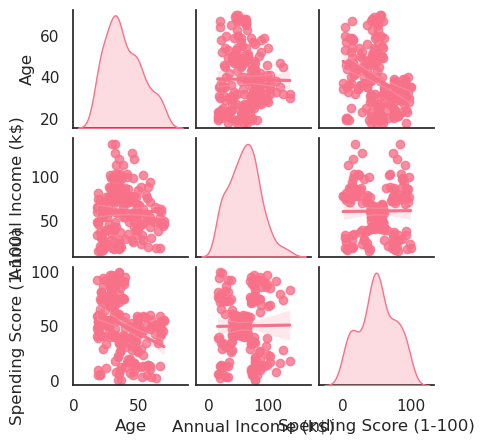

In [24]:
#Visualization
plt.figure(figsize=(15, 10))
sns.pairplot(df_customers, diag_kind="kde",height=1.5, x_vars=variables, y_vars=variables, kind='reg')
plt.savefig("pairplot.png")

 # <a name="C11"><font color='darkblue'>Statistical Tests</font></a>

# **Dependancy Age / Annual Income**

* H0 : there isn't a correlation between Age and Annual Income
* H1 : there is a correlation between Age and Annual Income

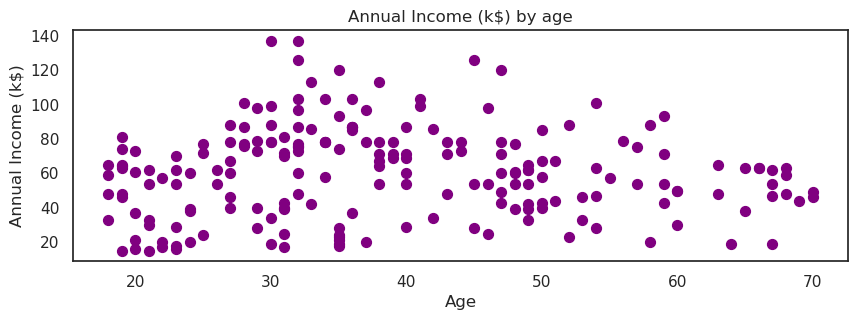

In [25]:
plt.figure(figsize=(10,3))
sns.regplot(data=df_customers, x="Age", y="Annual Income (k$)",fit_reg=False, scatter_kws={"color":"purple","alpha":1.0,"s":50})
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Annual Income (k$) by age')
plt.savefig("income_age.png")
plt.show()

In [26]:
#Pearson test : Pearson correlation coefficient and p-value
from scipy.stats import pearsonr 
CorrAgeIncome = pd.DataFrame(pearsonr(df_customers['Age'], df_customers['Annual Income (k$)']),index=['Pearson_coeff','p-value'],columns=['resultat_test']) 
CorrAgeIncome 

,resultat_test
Pearson_coeff,-0.012398
p-value,0.861675


In [27]:
#Spearman test
st.spearmanr(df_customers['Age'], df_customers['Annual Income (k$)'])

SpearmanrResult(correlation=0.01976676939845659, pvalue=0.7811510866452446)

Pearson coefficient is around 0 and p-value>0.05 so H0 is not rejected and we can say **there is not a correlation between age and annual income**.

# **Dependancy Age / Spending Score**

* H0 : there isn't a correlation between Age and Spending Score
* H1 : there is a correlation between Age and Spending Score

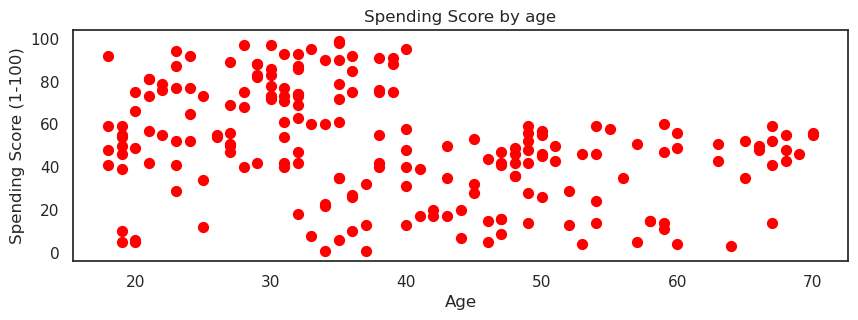

In [28]:
plt.figure(figsize=(10,3))
sns.regplot(data=df_customers, x="Age", y="Spending Score (1-100)",fit_reg=False, scatter_kws={"color":"red","alpha":1.0,"s":50})
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score by age')
plt.savefig("score_age.png")
plt.show()

In [29]:
#Pearson test : Pearson correlation coefficient and p-value
from scipy.stats import pearsonr 
CorrAgeScore = pd.DataFrame(pearsonr(df_customers['Age'], df_customers['Spending Score (1-100)']),index=['Pearson_coeff','p-value'],columns=['resultat_test']) 
CorrAgeScore 

,resultat_test
Pearson_coeff,-0.327227
p-value,0.000002


In [30]:
#Spearman test
st.spearmanr(df_customers['Age'], df_customers['Spending Score (1-100)'])

SpearmanrResult(correlation=-0.3449397740165373, pvalue=5.674387092093431e-07)

p-value < 0.05 => **Correlation between Age and Spending Score**

# **Dependancy Annual Income / Spending Score**

* H0 : there isn't a correlation between Annual Income and Spending Score
* H1 : there is a correlation between Annual Income and Spending Score

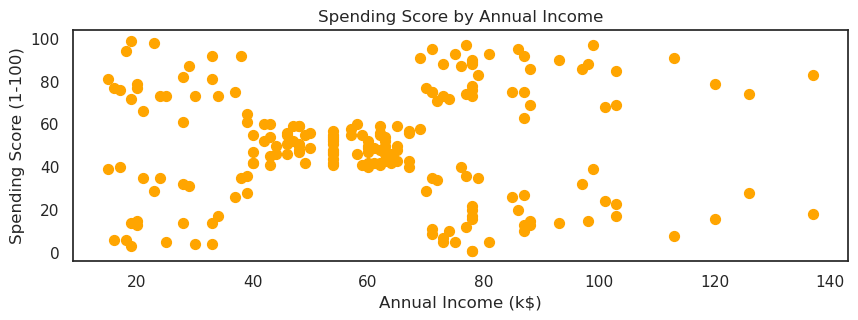

In [31]:
plt.figure(figsize=(10,3))
sns.regplot(data=df_customers, x="Annual Income (k$)", y="Spending Score (1-100)",fit_reg=False, scatter_kws={"color":"orange","alpha":1.0,"s":50})
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score by Annual Income')
plt.savefig("score_income.png")
plt.show()

In [32]:
#Pearson test : Pearson correlation coefficient and p-value
from scipy.stats import pearsonr 
CorrIncomeScore = pd.DataFrame(pearsonr(df_customers['Annual Income (k$)'], df_customers['Spending Score (1-100)']),index=['Pearson_coeff','p-value'],columns=['resultat_test']) 
CorrIncomeScore 

,resultat_test
Pearson_coeff,0.009903
p-value,0.889313


Pearson coefficient is around 0 and p-value>0.05 so H0 is not rejected and we can say **there is not a correlation between Spending Score and Annual Income**.

In [33]:
#Spearman Test
st.spearmanr(df_customers['Annual Income (k$)'], df_customers['Spending Score (1-100)'])

SpearmanrResult(correlation=0.007839641317528493, pvalue=0.9122697727000879)

# Relation with Genre

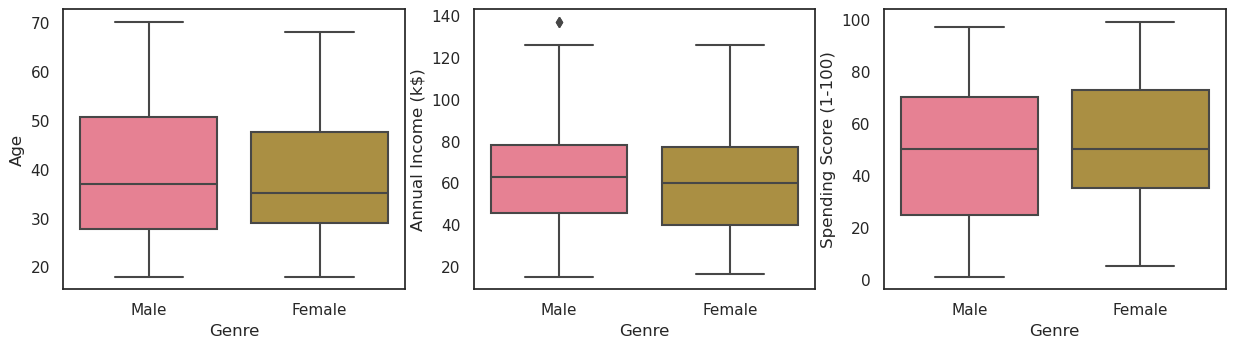

In [34]:
#boxplots by genre 
plt.figure(figsize=(15, 8))
sns.set(style="white", palette="husl")
plt.subplot(2, 3, 1)

plt.subplot(231)
sns.boxplot(data=df_customers, x='Genre', y='Age')

plt.subplot(232)
sns.boxplot(data=df_customers, x='Genre', y='Annual Income (k$)')

plt.subplot(233)
sns.boxplot(data=df_customers, x='Genre', y='Spending Score (1-100)')

plt.savefig("boxplots.png")
plt.show()
     

In [35]:
df_female=df_customers[(df_customers['Genre']=='Female')]
df_female

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
...,...,...,...,...,...
191,192,Female,32,103,69
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79


In [36]:
df_male=df_customers[(df_customers['Genre']=='Male')]
df_male

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
8,9,Male,64,19,3
10,11,Male,67,19,14
14,15,Male,37,20,13
...,...,...,...,...,...
187,188,Male,28,101,68
192,193,Male,33,113,8
197,198,Male,32,126,74
198,199,Male,32,137,18


In [37]:
#df_customers[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].groupby(['Genre', 'Age'], as_index=False).sum()

# KMEANS

In [38]:
# renommage : is_genuine en nature (vrai/faux)
df_customers=df_customers.replace({'Female': 1, 'Male': 0})
df_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [39]:
# préparation des données pour le clustering
X = df_customers
customer = df_customers.index

# Centrage et Réduction
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

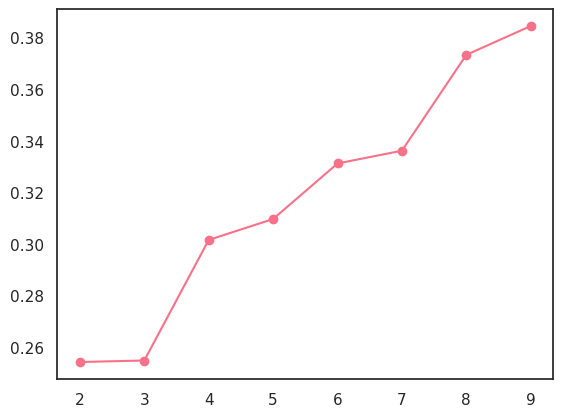

In [40]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

#Liste pour stocker nos coefficients
silhouettes = [] 

#Boucle itérative de 2 à 10 clusters pour tester toutes les possibilités de k
for k in range(2, 10): 
    #Création et ajustement d'un modèle pour chaque k
    cls = KMeans(n_clusters=k, random_state=0)  
    cls.fit(X_scaled)
    
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)
    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.plot(range(2, 10), silhouettes, marker='o')
plt.savefig('silhouette.png')
plt.show()


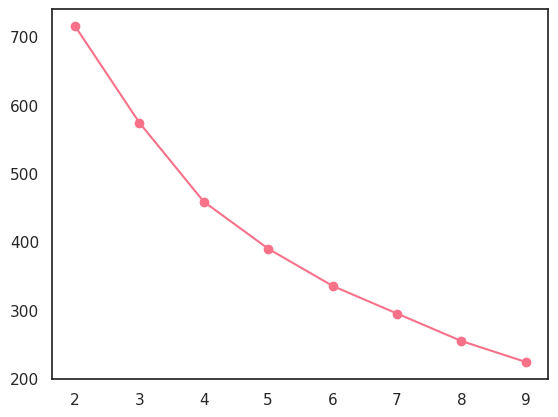

In [41]:
#Méthode du coude
#On crée une liste dans laquelle on stocke les inerties
inerties=[]

#On fait une boucle de 2 à 9 pour tester toutes ces possibiliéts
for k in range(2, 10):
    #pour chaque k, on crée un modèle et on l’ajuste
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    #on stocke l’inertie associée
    inerties.append(km.inertia_)

#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(range(2, 10), inerties, marker='o')

plt.savefig('coude.png')
plt.show()

In [42]:
#Algorithme du Kmeans 
from sklearn.cluster import KMeans

# Création du modèle k-means 
kmeans = KMeans(n_clusters=4, n_init=20, init='k-means++', random_state=1)
kmeans.fit(X_scaled)

# Détermine à quel cluster appartient chaque point (kmeans.labels_)
clusters =  kmeans.predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [43]:
# nombre d'individus dans chaque cluster
import numpy
numpy.unique(kmeans.labels_, return_counts=True)


(array([0, 1, 2, 3], dtype=int32), array([57, 63, 39, 41]))

In [58]:
# import module we'll need to import our custom module
from shutil import copyfile

# copy our file into the working directory (make sure it has .py suffix)
copyfile(src = " ", dst = "../working/functions.py")
# import all our functions
from my_functions import *

FileNotFoundError: [Errno 2] No such file or directory: 'https://www.kaggle.com/randaas/functions-py/edit'

In [51]:
from sklearn.decomposition import PCA
from sklearn import decomposition, preprocessing

n_comp=2

# Création du PCA pour réduire les données à 2 dimensions pour la visualisation
pca = PCA(n_components=n_comp)
pca.fit(X_scaled)

# Cercle des corrélations
from functions import display_circles
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(df_customers.columns))

# Projection des individus (nouvel espace vectoriel)
X_projected = pca.transform(X_scaled)

# Affiche un scatter plot des points des data dans le nouvel espace vectoriel
from functions import display_factorial_planes
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], labels=None, illustrative_var = clusters, alpha = 0.8)

# Eboulis des valeurs propres
from functions import display_scree_plot
display_scree_plot(pca)

plt.savefig("PCA.png")
plt.show()

ModuleNotFoundError: No module named 'functions'